In [1]:
library("dplyr")
library("rcompanion")
library("car")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




### Using the YouTube Channels dataset, determine if there is a difference in the number of views (Video.views differs between all the different grade categories (Grade). To do this, you will need to:

Test for all assumptions and correct for them if necessary
Run the appropriate ANOVA based on your assumptions
If significant, run the appropriate post hoc based on your assumptions
Interpret your results
Then write an overall, one-sentence conclusion about this data analysis.

In [2]:
YouTubeChannels <- read.csv("C:/Users/Marcy/Documents/Entity Coursework/DSO 105 Basic Stats in Python/Lesson 4/YouTubeChannels.csv")

In [3]:
head(YouTubeChannels)

,Rank,Grade,Channel.name,Video.Uploads,Subscribers,Video.views
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1st,A++,Zee TV,82757,18752951,20869786591
2,2nd,A++,T-Series,12661,61196302,47548839843
3,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
4,4th,A++,SET India,27323,31180559,22675948293
5,5th,A++,WWE,36756,32852346,26273668433
6,6th,A++,Movieclips,30243,17149705,16618094724


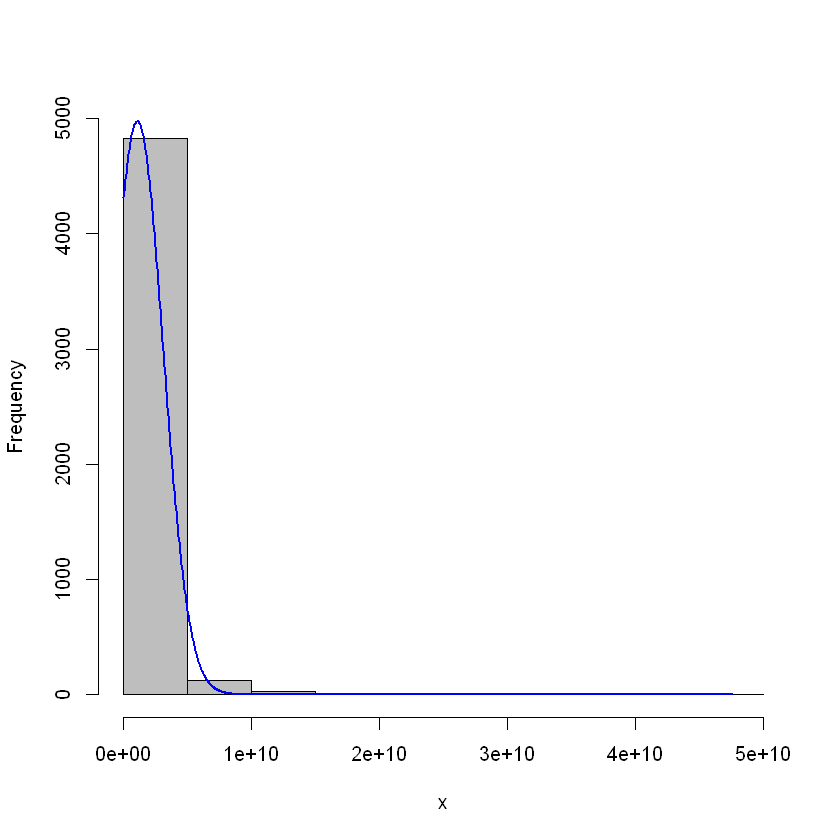

In [5]:
plotNormalHistogram(YouTubeChannels$Video.views)

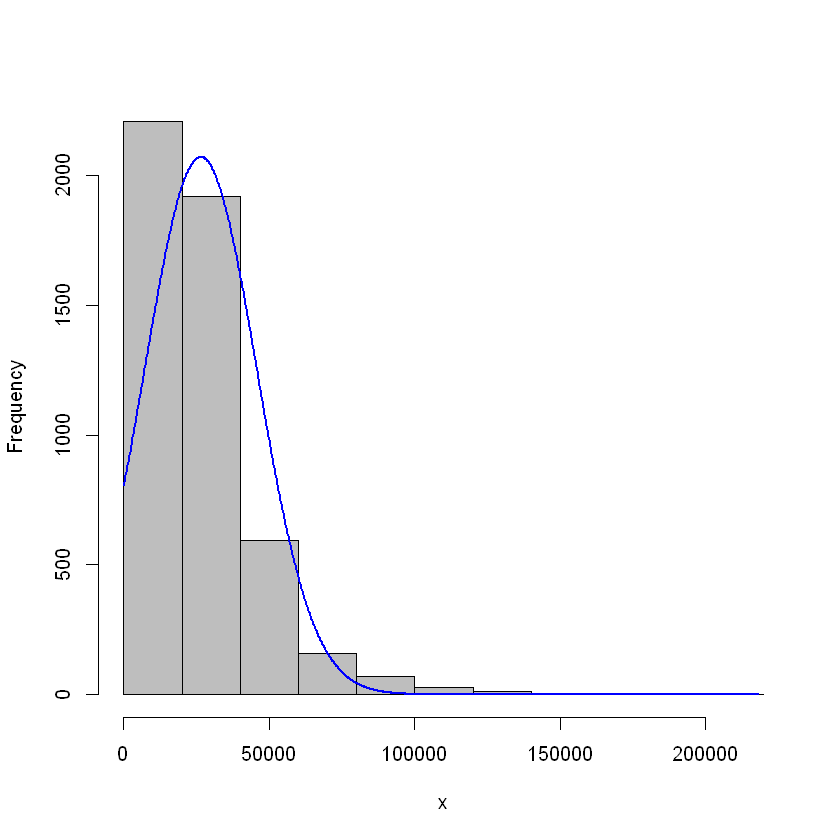

In [6]:
YouTubeChannels$Video.viewsSQRT <- sqrt(YouTubeChannels$Video.views)
plotNormalHistogram(YouTubeChannels$Video.viewsSQRT)

#### Log just in case

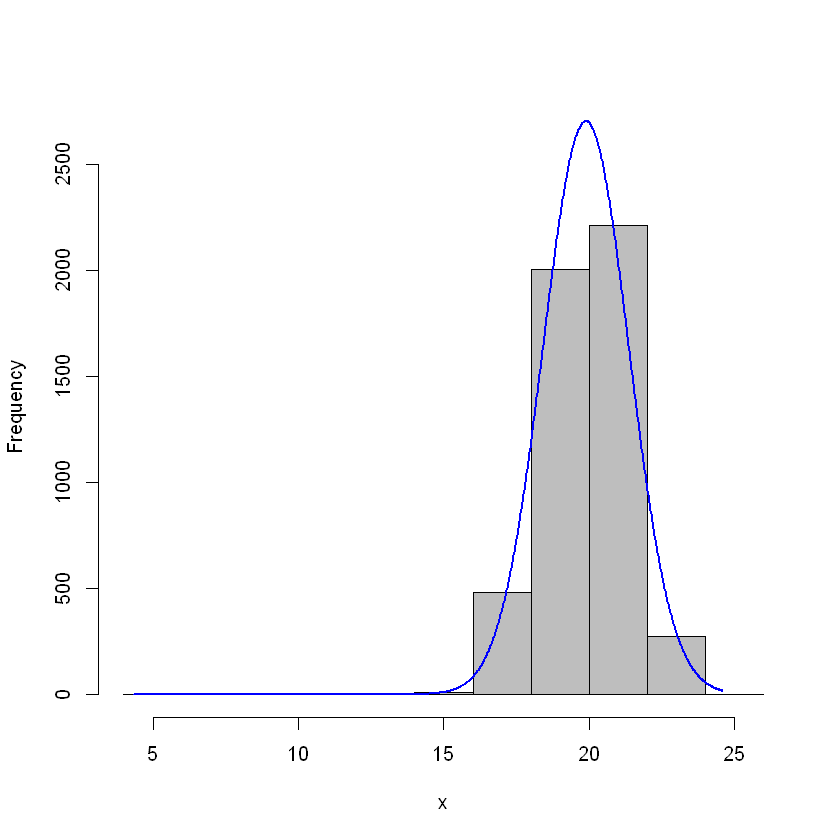

In [7]:
YouTubeChannels$Video.viewsLOG <- log(YouTubeChannels$Video.views)
plotNormalHistogram(YouTubeChannels$Video.viewsLOG)

#### too far

#### Honogeneity of Variance

In [8]:
bartlett.test(Video.viewsSQRT ~ Grade, data=YouTubeChannels)


	Bartlett test of homogeneity of variances

data:  Video.viewsSQRT by Grade
Bartlett's K-squared = 1107.1, df = 5, p-value < 2.2e-16


#### does not meet. try unequal variance

In [9]:
ANOVA1 <- lm(Video.viewsSQRT ~ Grade, data=YouTubeChannels)
Anova(ANOVA1, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
Grade,5,215.9149,4.112783e-209
Residuals,4994,NA,NA


#### post hocs

In [10]:
pairwise.t.test(YouTubeChannels$Video.viewsSQRT, YouTubeChannels$Grade, p.adjust="bonferroni", pool.sd = FALSE)



	Pairwise comparisons using t tests with non-pooled SD 

data:  YouTubeChannels$Video.viewsSQRT and YouTubeChannels$Grade 

     A-      A       Â       A+      A++    
A    < 2e-16 -       -       -       -      
Â    0.00146 1.7e-05 -       -       -      
A+   2.2e-09 1.9e-05 8.9e-14 -       -      
A++  0.00029 0.00084 6.8e-05 0.00874 -      
B+   < 2e-16 < 2e-16 0.03203 2.1e-11 0.00017

P value adjustment method: bonferroni 

#### all grades differ significantly - with higher grades getting more views.